# K-Means Clustering

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Importing the dataset

In [4]:
dataset = pd.read_csv(r'C:\Users\DELL\Downloads\clustering\Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

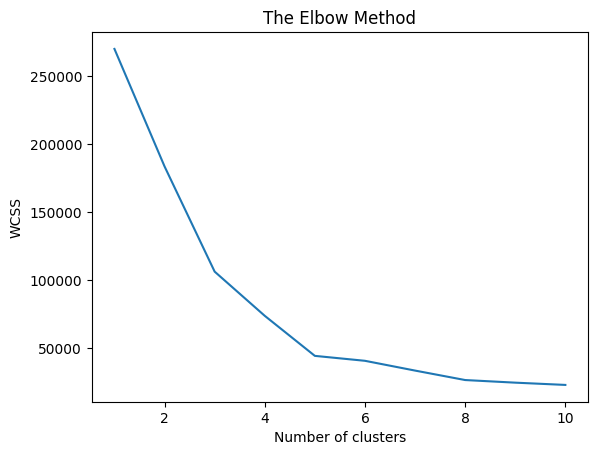

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

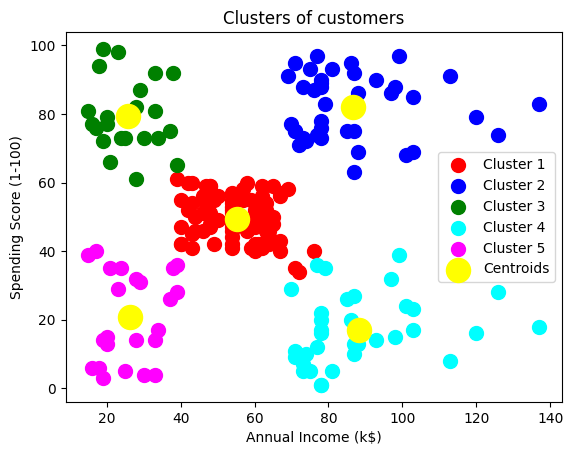

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

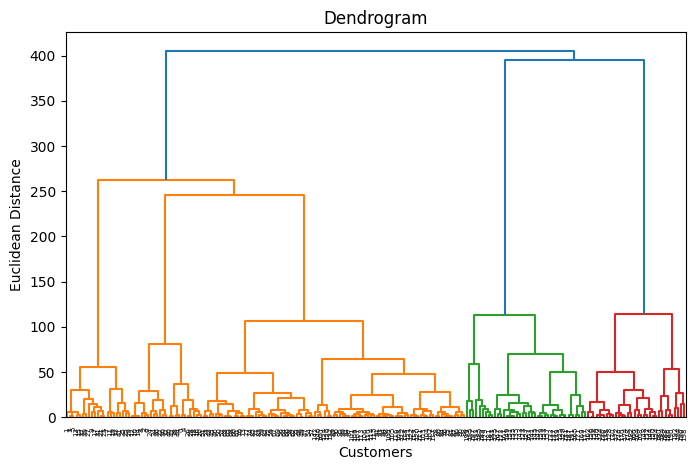

In [10]:
# Plot Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [11]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

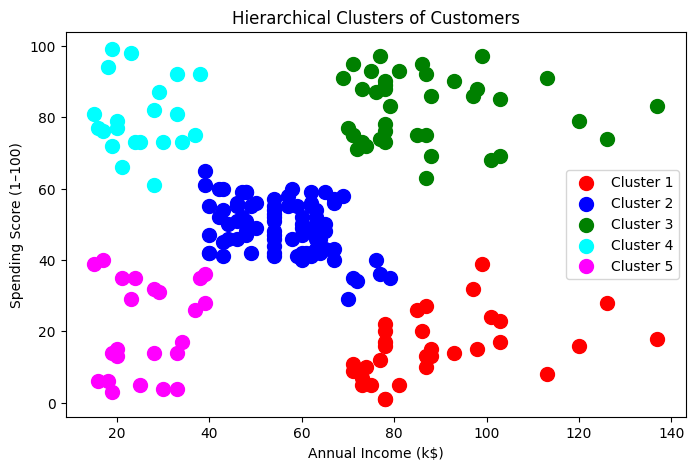

In [12]:
# Plotting Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Hierarchical Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()

In [14]:
dataset['Cluster_HC'] = y_hc
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_HC
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


# DBSCAN

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is another clustering method that:

Groups together points close to each other (high density regions).
Marks points in low-density regions as outliers.
Works well for irregularly shaped clusters and noisy datasets.
Key Terms:

Core Point: Has at least min_samples points within eps radius.
Border Point: Lies within eps of a core point but has fewer than min_samples neighbors.
Outlier: Neither core nor border point.

In [15]:
from sklearn.cluster import DBSCAN

# Fitting DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

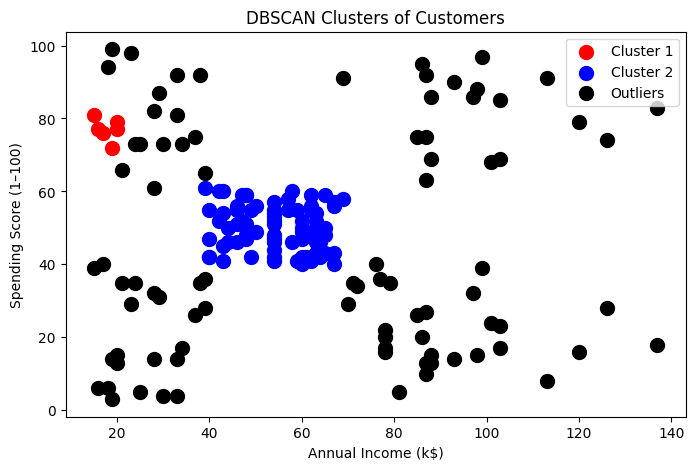

In [16]:
# Plot DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s=100, c='black', label='Outliers')

plt.title('DBSCAN Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()

In [17]:
# Adding DBSCAN cluster results to DataFrame
dataset['Cluster_DBSCAN'] = y_dbscan
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_HC,Cluster_DBSCAN
0,1,Male,19,15,39,4,-1
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,-1
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,-1


Conclusion

If clusters are well-separated & number of clusters is known → Use K-Means for speed and simplicity.
If number of clusters is unknown but data is small-to-medium size → Use Hierarchical Clustering with a dendrogram for visual inspection.
If data contains noise or irregular shapes → Use DBSCAN for better flexibility and outlier detection.
Final Takeaway:

For Mall Customers Segmentation:

K-Means and Hierarchical both suggest 5 customer groups with clear marketing opportunities.
DBSCAN is more strict, grouping dense areas while labeling unusual customers as outliers — helpful for fraud detection, anomaly spotting, or niche marketing.
Combining these methods can give a full 360° view of customer behavior.